# Exercise1 Text Modelling & Natural Language Understanding

This exercise sheet will serve as supplementary to lectures and help you to familiarize yourself with Python, Tensroflow, and other commonly used packages.

If you are not familiar with Python, you may want to learn more about Python
and its basic syntax. Since there are a lot of free and well-written tutorials
 online, we refer you to one of the following online tutorials:

* http://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
* https://www.learnpython.org/
* https://www.w3schools.com/python/
* https://automatetheboringstuff.com/


### Bag of Words

A bag of words is a representation of text that describes the occurrence of words within the corpus. Here we are going to have a hands-on exercise to better understand this approach.

Given the following sentences:
- OpenAI developed ChatGPT.
- ChatGPT is a large language model.
- Language technology is interestng.

**Question**:


1.   What is the vocabulary?
2.   Encode these sentences with the vocabulary.

**Answers**:
1.   openai, developed, chatgpt, is, a, large, language, model, technology, interesting
2.   - {"openai": 1, "developed": 1}
     - {"chatgpt": 1, "is": 1, "a": 1, "large": 1, "language": 1, "model": 1}
     - {"language": 1, "technology": 1, "is": 1, "interesting": 1}

### N-gram Language Model

Next, we are going to have a coding exercise about the n-gram language model. We have a corpus that is one chapter from a book and has almost 1000 lines. In this exercise, rather than building every function from scratch, we are going to use the toolkit NLTK, which is a suite of open-source Python modules, data sets, and tutorials supporting research and development in Natural Language Processing.

For more information about NLTK, please refer to the official documentation: https://www.nltk.org/


In [1]:
# Firstly, let's download the data for this exercises
!wget https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt

--2025-05-05 16:31:17--  https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278779 (272K) [text/plain]
Saving to: ‘botchan.txt’

botchan.txt         100%[===================>] 272.25K  --.-KB/s    in 0.04s   

2025-05-05 16:31:17 (7.53 MB/s) - ‘botchan.txt’ saved [278779/278779]



In [1]:
# If you are running with colab, this toolkit should be installed.
import nltk
print(nltk.__version__)
nltk.download('punkt_tab')

3.9.1


[nltk_data] Downloading package punkt_tab to /home/niels/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# Load punctuations that to be removed in later preprocessing.
import nltk, re, pprint, string
from nltk import word_tokenize, sent_tokenize

puncs = string.punctuation +'“'+'”'+'-'+'’'+'‘'+'—'
print(puncs)

puncs = puncs.replace('.', '')
print(puncs)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~“”-’‘—
!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~“”-’‘—


In [8]:
# Load the corpus
file = open('botchan.txt', encoding = 'utf8').read()
#preprocess data
file_nl_removed = ""
for line in file:
  line_nl_removed = line.replace("\n", " ")           #removes newlines
  file_nl_removed += line_nl_removed

file_p = "".join([char for char in file_nl_removed if char not in puncs])   #removes all special characters. Save the data as a string.

In [9]:
file_p[:1000] # Display the first 1000 elements

'\ufeffProject Gutenbergs Botchan Master Darling by Kinnosuke Natsume This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it give it away or reuse it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title Botchan Master Darling Author Kinnosuke Natsume Translator Yasotaro Morri Posting Date October 14 2012 EBook 8868 Release Date September 2005 First Posted August 17 2003 Language English  START OF THIS PROJECT GUTENBERG EBOOK BOTCHAN MASTER DARLING  Produced by David Starner and the Online Distributed Proofreading Team BOTCHAN MASTER DARLING By The Late Mr. Kinnosuke Natsume TRANSLATED By Yasotaro Morri Revised by J. R. KENNEDY 1919 A NOTE BY THE TRANSLATOR No translation can expect to equal much less to excel the original. The excellence of a translation can only be judged by noting how far it has succeeded in reproducing the original tone colors style the delicacy of

In [10]:
# Check some statistics about the data. Here you need to complete the codes with reference: https://www.nltk.org/api/nltk.tokenize.html
sents = sent_tokenize(file_p)
print("The number of sentences is", len(sents)) #prints the number of sentences

words = word_tokenize(file_p)
print("The number of tokens is", len(words)) #prints the number of tokens

average_tokens = round(len(words)/len(sents))
print("The average number of tokens per sentence is", average_tokens) #prints the average number of tokens per sentence

unique_tokens = set(words)
print("The number of unique tokens are", len(unique_tokens)) #prints the number of unique tokens

The number of sentences is 2787
The number of tokens is 53568
The average number of tokens per sentence is 19
The number of unique tokens are 6293


In [11]:
# Now let's collect ngrams
from nltk.util import ngrams #https://www.nltk.org/_modules/nltk/util.html#ngrams
unigram=[]
bigram=[]
trigram=[]
fourgram=[]
tokenized_text = []

for sentence in sents:
    sentence = sentence.lower() # Lower the sentence for simplification
    sequence = word_tokenize(sentence) # Word-level
    for word in sequence:
        if (word =='.'):
            sequence.remove(word)
        else:
            unigram.append(word)
    tokenized_text.append(sequence)
    bigram.extend(list(ngrams(sequence, 2)))
    trigram.extend(list(ngrams(sequence, 3)))
    fourgram.extend(list(ngrams(sequence, 4)))

In [12]:
print(f'Lengths of unigram, bigram, trigram and fourgram are {len(unigram)}, {len(bigram)}, {len(trigram)}, {len(fourgram)}')

Lengths of unigram, bigram, trigram and fourgram are 50796, 48009, 45246, 42515


In [13]:
# Inspect
print(tokenized_text[:2])

print(unigram[:5])
print(bigram[:5])
print(trigram[:5])
print(fourgram[:5])

[['\ufeffproject', 'gutenbergs', 'botchan', 'master', 'darling', 'by', 'kinnosuke', 'natsume', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever'], ['you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'reuse', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.org', 'title', 'botchan', 'master', 'darling', 'author', 'kinnosuke', 'natsume', 'translator', 'yasotaro', 'morri', 'posting', 'date', 'october', '14', '2012', 'ebook', '8868', 'release', 'date', 'september', '2005', 'first', 'posted', 'august', '17', '2003', 'language', 'english', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'botchan', 'master', 'darling', 'produced', 'by', 'david', 'starner', 'and', 'the', 'online', 'distributed', 'proofreading', 'team', 'botchan', 'master', 'darling', 'by', 'the', 'late', 'mr.', 

In [14]:
freq_uni = nltk.FreqDist(unigram)
freq_bi = nltk.FreqDist(bigram)
freq_tri = nltk.FreqDist(trigram)
freq_four = nltk.FreqDist(fourgram)

print ("Most common unigram: ", freq_uni.most_common(5))
print ("Most common bigrams: ", freq_bi.most_common(5))
print ("Most common trigrams: ", freq_tri.most_common(5))
print ("Most common fourgrams: ", freq_four.most_common(5))

Most common unigram:  [('the', 2755), ('i', 1714), ('to', 1472), ('and', 1310), ('of', 1258)]
Most common bigrams:  [(('of', 'the'), 316), (('in', 'the'), 223), (('to', 'the'), 189), (('red', 'shirt'), 174), (('i', 'was'), 137)]
Most common trigrams:  [(('i', 'did', 'not'), 39), (('it', 'would', 'be'), 32), (('i', 'could', 'not'), 28), (('of', 'red', 'shirt'), 24), (('to', 'the', 'school'), 21)]
Most common fourgrams:  [(('one', 'sen', 'and', 'a'), 13), (('sen', 'and', 'a', 'half'), 13), (('the', 'project', 'gutenberg', 'literary'), 13), (('project', 'gutenberg', 'literary', 'archive'), 13), (('gutenberg', 'literary', 'archive', 'foundation'), 13)]


In [20]:
# Predict the next word
str1 = 'i like the'
token1 = word_tokenize(str1)

num_gram = 2  # what if 4, 5

results = list(ngrams(token1, num_gram))
search=results[-1]
print('Searching ', search)
preds=[]

# Naive search with a for loop

for each in trigram:
  if each[:-1]==search:
    preds.append(each[-1])
print('Found ', preds)

# What to predict?
from collections import Counter
word_counts = Counter(preds)
print('Most Common words with counts is: ', word_counts.most_common(1))

Searching  ('like', 'the')
Found  ['cheap', 'undue', 'dwarf', 'name', 'wrestling', 'inmates', 'tradespeople', 'wrestling']
Most Common words with counts is:  [('wrestling', 2)]


In [ ]:
# Other popular ngram LM with scoring functions

# https://github.com/kmario23/KenLM-training

### Byte Pair Encoding

Byte Pair Encoding (BPE) was initially developed as an algorithm to compress data, and now is commonly used in natural language processing tasks such as machine translation and text generation. BPE starts by computing the unique set of characters used in the corpus, then building the vocabulary by taking all the symbols used to write those words.




#### Calcuation

Here we are going to implement BPE with a simple corpus step by step.

Given the corpus like the following:

- happy * 3
- lucky * 2
- cool * 2
- good * 2

You can inteprete each word as a single sentence. For example, the split of the words happy as {h_a_p_p_y_/w}

**Questions**:


1.   What is the initial vocabulary? Hint: don't forget the token **/w** at the end of each word.
2.   What is the merge operation in the first iteration?
3.   Let's say we would like to have a vocabulary with size 15. Calculate the vocabulary and the merging rules.

**Answers**:
1. {h, a, p, y, l, u, c, k, o, g, /w}
2. y_/w -> y/w
3. <img src="IMG_1049.jpg" alt="drawing" width="500"/>


#### Coding
Next we are going to build a BPE model with [SentencePiece](https://github.com/google/sentencepiece/tree/master).

In [1]:
# Coding exercise
!pip install sentencepiece



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!head -n 3 botchan.txt # Display the first three rows

﻿Project Gutenberg's Botchan (Master Darling), by Kin-nosuke Natsume
This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or


In [3]:
import sentencepiece as spm
# train sentencepiece model from `botchan.txt` and makes `m.model` and `m.vocab`
# `m.vocab` is just a reference. not used in the segmentation.
spm.SentencePieceTrainer.train(input='botchan.txt', model_prefix='m', vocab_size=2000)

# makes segmenter instance and loads the model file (m.model)
sp = spm.SentencePieceProcessor()
sp.load('m.model')

# encode: text => id
print(sp.encode_as_pieces('This is a test'))
print(sp.encode_as_ids('This is a test'))

# decode: id => text
print(sp.decode_pieces(sp.encode_as_pieces('This is a test')))
print(sp.decode_ids(sp.encode_as_ids('This is a test')))

['▁This', '▁is', '▁a', '▁t', 'est']
[208, 31, 9, 434, 601]
This is a test
This is a test


sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: botchan.txt
  input_format: 
  model_prefix: m
  model_type: UNIGRAM
  vocab_size: 2000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_

In [4]:
# returns vocab size
print(sp.vocab_size())

# <unk>, <s>, </s> are defined by default. Their ids are (0, 1, 2)
# <s> and </s> are defined as 'control' symbol.
for id in range(3):
  print(sp.id_to_piece(id))

2000
<unk>
<s>
</s>


In [7]:
# The impact of vocab size.
for vocab_size in [100, 500, 5000]:
  spm.SentencePieceTrainer.train(input='botchan.txt', model_prefix='m', vocab_size=vocab_size)
  sp = spm.SentencePieceProcessor()
  sp.load('m.model')
  print(sp.encode_as_pieces('This is exercise 1'))

 # What if vocab_size is 50?

['▁', 'T', 'h', 'i', 's', '▁', 'i', 's', '▁', 'e', 'x', 'er', 'c', 'i', 's', 'e', '▁', '1']
['▁This', '▁is', '▁ex', 'er', 'c', 'is', 'e', '▁', '1']
['▁This', '▁is', '▁exercise', '▁1']


sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: botchan.txt
  input_format: 
  model_prefix: m
  model_type: UNIGRAM
  vocab_size: 100
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_p

## Sequence Labeling


### Span representations

Span representations are often used as a component in recent models for a number of natural language processing (NLP) tasks, such as question answering.There are three popular schemes as the following!

- In the IO scheme, each token in the sequence is labeled as either inside the entity (I) or outside the entity (O).
- The BIO scheme, on the other hand, uses two types of tags to indicate whether a token is the beginning (B) of an entity or inside (I) an entity.
- BILOU scheme is similar to the BIO scheme, but it includes additional labels to indicate whether a token is the last (L) in an entity, a unit (U) entity, or an outside (O) entity.

**Question**:

Given the tags: **Loc(ation), Org(aniztion), Cou(rse)**, use IO, BIO and BILOU schemes to label the tags in the sentence:

We would set the *Karlsruhe* as Location, the *Artificial Intelligence* as Course and *Institute of Technology* as Organization

**I live in Karlsruhe and study artificial intelligence at Karlsruhe Institute of Technology**

**Answer**:
1. "I": O, "live": O, "in": O, "Karlsruhe": Loc, "and": O, "study": O, "artificial": Cou, "intelligence": Cou, "at": O, "Karlsruhe": Org, "Institute": Org, "of": Org, "Technology": Org
2. "I": O, "live": O, "in": O, "Karlsruhe": B-Loc, "and": O, "study": O, "artificial": B-Cou, "intelligence": I-Cou, "at": O, "Karlsruhe": B-Loc, "Institute": B-Org, "of": I-Org, "Technology": L-Org
3. "I": O, "live": O, "in": O, "Karlsruhe": U-Loc, "and": O, "study": O, "artificial": B-Cou, "intelligence": L-Cou, "at": O, "Karlsruhe": U-Loc, "Institute": B-Org, "of": I-Org, "Technology": L-Org

### Coding: Named-Entity Recognition

In this exercise, we are going to build a transformer-based machine learning model to automatically predict the taggings with a NER dataset.



In this dataset, entities appear in a chunks of word. The BIO tagging scheme is used to identify boundaries. The BIO tags are further classified into the following classes:

*   geo = Geographical Entity
*   org = Organization
*   per = Person
*   gpe = Geopolitical Entity
*   tim = Time indicator
*   art = Artifact
*   eve = Event
*   nat = Natural Phenomenon

In [8]:
!wget https://bwsyncandshare.kit.edu/s/NSXiFZQP3Zk4y8L/download/NER_data.csv

--2025-05-06 12:14:29--  https://bwsyncandshare.kit.edu/s/NSXiFZQP3Zk4y8L/download/NER_data.csv
Resolving bwsyncandshare.kit.edu (bwsyncandshare.kit.edu)... 2a00:1398:b::8d03:8781, 141.3.135.129
Connecting to bwsyncandshare.kit.edu (bwsyncandshare.kit.edu)|2a00:1398:b::8d03:8781|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14159575 (14M) [text/csv]
Saving to: ‘NER_data.csv’

NER_data.csv        100%[===================>]  13.50M  65.7MB/s    in 0.2s    

2025-05-06 12:14:30 (65.7 MB/s) - ‘NER_data.csv’ saved [14159575/14159575]



In [1]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('NER_data.csv', encoding='ISO-8859-1')
data['Sentence #'] = data['Sentence #'].fillna(method='ffill')

ModuleNotFoundError: No module named 'torch'

In [3]:
data.head(10) # Show the first 10 samples. POS stands for part-of-speech tagging task, which is not used here.

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [4]:

# Unique words and tags
vocab_word = list(set(data["Word"].values))
vocab_tag = list(set(data["Tag"].values))
word2idx = {word: idx + 2 for idx, word in enumerate(vocab_word)}
word2idx["<PAD>"] = 0
word2idx["<UNK>"] = 1
tag2idx = {tag: idx for idx, tag in enumerate(vocab_tag)}
idx2tag = {i: t for t, i in tag2idx.items()}

# Combine sentences
def sentence_combine(data):
    agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                       s["POS"].values.tolist(),
                                                       s["Tag"].values.tolist())]
    return data.groupby("Sentence #").apply(agg_func).tolist()

sentences = sentence_combine(data)

print(sentences[0])

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


/tmp/ipykernel_63949/1092368143.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return data.groupby("Sentence #").apply(agg_func).tolist()


In [5]:

# Encode and pad
MAX_LEN = 50
def encode_sentence(sent):
    word_idxs = [word2idx.get(w[0], word2idx["<UNK>"]) for w in sent]
    tag_idxs =  [tag2idx.get(w[1], tag2idx["O"]) for w in sent]#
    word_idxs = word_idxs[:MAX_LEN] + [word2idx["<PAD>"]] * (MAX_LEN - len(word_idxs))
    tag_idxs = tag_idxs[:MAX_LEN] + [tag2idx["O"]] * (MAX_LEN - len(tag_idxs))
    return torch.tensor(word_idxs), torch.tensor(tag_idxs)

encoded = [encode_sentence(s) for s in sentences]
X, y = zip(*encoded)

# Train/Val/Test Split
# Train/Val/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)





In [6]:
print(len(X_train))
print(len(y_train))

print(X_train[0])
print(y_train[0])

33571
33571
tensor([28659, 27663, 19968, 15509, 18624, 13760, 12205, 16932, 14050, 22085,
        27663,  8361, 15191,  1530, 27344, 22964,  9930,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5])


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

train_loader = DataLoader(TensorDataset(torch.stack(X_train), torch.stack(y_train)), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(torch.stack(X_val), torch.stack(y_val)), batch_size=32)
test_loader = DataLoader(TensorDataset(torch.stack(X_test), torch.stack(y_test)), batch_size=32)

Using device: cpu


In [15]:
# Transformer Model
class NERTransformer(nn.Module):
    def __init__(self, vocab_size, tagset_size, emb_dim=128, nhead=8, nhid=256, nlayers=2):
        super(NERTransformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        encoder_layer = nn.TransformerEncoderLayer(d_model=emb_dim, nhead=nhead, dim_feedforward=nhid)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=nlayers)
        self.fc = nn.Linear(emb_dim, tagset_size)

    def forward(self, x):
        emb = self.embedding(x).permute(1, 0, 2)  # [seq_len, batch, emb_dim]
        out = self.transformer(emb).permute(1, 0, 2)  # [batch, seq_len, emb_dim]
        return self.fc(out)

model = NERTransformer(vocab_size=len(word2idx), tagset_size=len(tag2idx)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
def train_model(model, train_loader, val_loader, epochs=5):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs.view(-1, outputs.shape[-1]), y_batch.view(-1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs.view(-1, outputs.shape[-1]), y_batch.view(-1))
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
    return train_losses, val_losses

train_losses, val_losses = train_model(model, train_loader, val_loader, epochs=5)


/home/niels/coding/fki/.venv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/5, Train Loss: 0.0064, Val Loss: 0.0000
Epoch 2/5, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 3/5, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 4/5, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 5/5, Train Loss: 0.0000, Val Loss: 0.0000



Val Accuracy: 1.0000

Test Accuracy: 1.0000


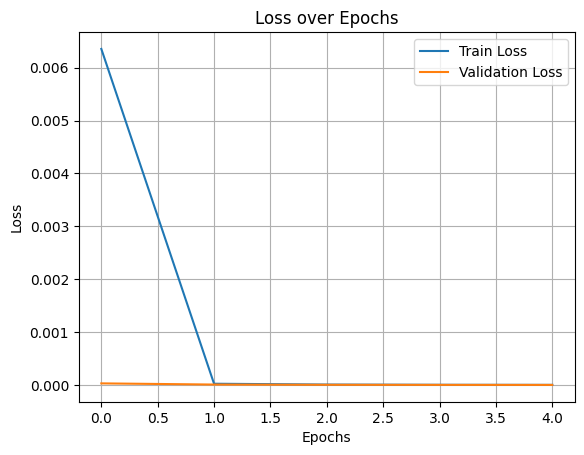

In [16]:
# Evaluation
def evaluate(model, data_loader):
    model.eval()
    total, correct = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predictions = torch.argmax(outputs, dim=-1)
            correct += (predictions == y_batch).sum().item()
            total += torch.numel(y_batch)
    return correct / total


val_acc = evaluate(model, val_loader)
print(f"\nVal Accuracy: {val_acc:.4f}")

test_acc = evaluate(model, test_loader)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Predict on test set
def predict_on_test(model, test_loader, idx2tag, max_batches=3):
    model.eval()
    results = []

    with torch.no_grad():
        for i, (X_batch, y_batch) in enumerate(test_loader):
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            predictions = torch.argmax(outputs, dim=-1).cpu().numpy()
            X_batch = X_batch.cpu().numpy()
            y_batch = y_batch.cpu().numpy()

            for x, y_true, y_pred in zip(X_batch, y_batch, predictions):
                words = [list(word2idx.keys())[list(word2idx.values()).index(w)] if w in word2idx.values() and w > 1 else "<UNK>" for w in x]
                tags_true = [idx2tag[idx] for idx in y_true]
                tags_pred = [idx2tag[idx] for idx in y_pred]
                results.append(list(zip(words, tags_true, tags_pred)))
            if i + 1 >= max_batches:
                break
    return results

# Run predictions on test
predicted_test_samples = predict_on_test(model, test_loader, idx2tag)

# Print examples
print("\nSample predictions on test data:")
for i, sentence in enumerate(predicted_test_samples[:5]):
    print(f"\nSentence {i + 1}:")
    for word, true_tag, pred_tag in sentence:
        print(f"{word:15} | True: {true_tag:10} | Pred: {pred_tag}")



Sample predictions on test data:

Sentence 1:
From            | True: O          | Pred: O
2004            | True: O          | Pred: O
to              | True: O          | Pred: O
2007            | True: O          | Pred: O
,               | True: O          | Pred: O
the             | True: O          | Pred: O
economy         | True: O          | Pred: O
grew            | True: O          | Pred: O
about           | True: O          | Pred: O
10              | True: O          | Pred: O
%               | True: O          | Pred: O
per             | True: O          | Pred: O
year            | True: O          | Pred: O
,               | True: O          | Pred: O
driven          | True: O          | Pred: O
largely         | True: O          | Pred: O
by              | True: O          | Pred: O
an              | True: O          | Pred: O
expansion       | True: O          | Pred: O
in              | True: O          | Pred: O
the             | True: O          | Pred: O
garment 